# Proyek Analisis Data: 
- **Nama:** Robert
- **Email:** m320d4ky1983@bangkit.academy
- **ID Dicoding: robert_m320d4ky1983** 

## Menentukan Pertanyaan Bisnis

- Di tahun mana seluruh level substansi terbanyak dan terendah berdasarkan seluruh rata-rata level substansi?
- Stasiun mana yang memiliki level substansi tertinggi?
- Bagaimana kualitas udara di setiap stasiun berdasarkan penilaian polusi di setiap 24 jam atau tahunan?

## Import Semua Packages/Library yang Digunakan

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [6]:
!pip install networkx

- numpy: digunakan untuk melakukan operasi matematis pada tabel ataupun matriks
- pandas: untuk visualisasi tabel dan pivot tabel dengan kebebasan manipulasi data yang tinggi
- matplotlib.pyplot: untuk visualisasi chart pada data yang telah diolah
- seaborn: untuk visualisasi chart pada data yang telah diolah dengan lebih interaktif

## Data Wrangling

### Gathering Data

In [7]:
aotizhongxin_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
huarou_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
nongzhangguan_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")



In [8]:
station_values_list = [
    aotizhongxin_df, changping_df, dingling_df, dongsi_df,
    guanyuan_df, gucheng_df, huarou_df, nongzhangguan_df,
    shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df
]

In [9]:
stations_all_df = pd.concat(station_values_list)

In [10]:
stations_all_df_raw = pd.concat(station_values_list)

In [11]:
stations_all_df_raw.drop(columns=['wd','station']).groupby(by="hour").agg('mean')

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,87.588425,114.837020,15.022697,57.935018,1372.028279,41.953787,11.276337,1011.173939,3.131974,0.068204,1.357760
1,17522.0,2014.66256,6.52293,15.729637,86.559755,111.115428,15.044727,55.748583,1375.019198,38.195415,10.818338,1011.108524,3.174464,0.052656,1.322026
2,17523.0,2014.66256,6.52293,15.729637,84.516251,106.611398,14.620920,53.261864,1322.443626,34.299260,10.370369,1011.057158,3.123236,0.066197,1.281280
3,17524.0,2014.66256,6.52293,15.729637,82.014665,102.155685,13.639941,52.319681,1278.368814,31.971504,9.975357,1010.985061,3.033539,0.093475,1.257113
4,17525.0,2014.66256,6.52293,15.729637,79.299768,97.682206,13.161391,51.728208,1237.448963,30.761737,9.651218,1010.985456,2.913446,0.069542,1.234443
5,17526.0,2014.66256,6.52293,15.729637,76.395365,93.727750,12.721129,50.972460,1249.341026,28.440678,9.429199,1011.133567,2.840623,0.052093,1.248058
6,17527.0,2014.66256,6.52293,15.729637,74.240960,92.165808,12.699322,50.759201,1265.254600,27.259090,9.620682,1011.399172,2.820928,0.044663,1.292197
7,17528.0,2014.66256,6.52293,15.729637,73.272242,93.720074,13.174739,52.580929,1293.156520,25.469208,10.522386,1011.732746,2.769542,0.039986,1.410236
8,17529.0,2014.66256,6.52293,15.729637,74.533339,98.512245,14.793900,54.274423,1341.603266,27.127219,11.901775,1012.011015,2.650374,0.038819,1.569871


In [12]:
stations_all_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


- pertama, baca seluruh data csv yang telah didownload
- kemudian semua dataframe dimasukkan kedalam list dan digabungkan menjadi 1 dataframe
- dataframe memiliki dimensi 420.768 observasi dengan 18 fitur

### Assessing Data

#### Check Missing Data

In [13]:
if stations_all_df.isnull().any().any():
    print("station dataframe HAS NULL DATA  with total {} missing data".format(stations_all_df.isnull().sum().sum()))
else:
    print("station dataframe HAS NO NULL DATA".format(station))

station dataframe HAS NULL DATA  with total 74027 missing data


Berdasarkan pengecekan data yang null, seluruh data stasiun memiliki data null sehingga akan dilakukan proses cleaning

#### Check Duplicated data

In [14]:
if stations_all_df.duplicated().any():
    print("station dataframe HAS DUPLICATED DATA")
else:
    print("station dataframe HAS NO DUPLICATED DATA")

station dataframe HAS NO DUPLICATED DATA


Berdasarkan pengecekan data duplikasi, tidak ada observasi data yang terduplikasi

### Cleaning Data

#### Handling Missing Value

Dalam mengatasi missing value, akan menggunakan teknik interpolasi. Teknik ini cocok digunakan untuk data time series. untuk wind direction akan menggunakan teknik imputasi

In [16]:
#handle missing value di setiap parameter substansi semua tabel 
substances = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "WSPM", "RAIN"]

for substance in substances:
    stations_all_df[substance] = stations_all_df[substance].interpolate(method='linear', limit_direction='forward')
stations_all_df["wd"].fillna(stations_all_df["wd"].mode()[0], inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_20060\3009715099.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stations_all_df["wd"].fillna(stations_all_df["wd"].mode()[0], inplace=True)


Dalam mengatasi missing value, akan menggunakan teknik interpolasi. Teknik ini cocok digunakan untuk data time series.

In [17]:
stations_all_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Check Outliers

untuk melakukan pengecekan dan penghapusan outlier, diperlukan pemahaman batas maksimum dan batas minumum yang wajar, oleh karena itu dilakukan pengecekan data min dan max dari setiap substansi


In [18]:
stations_all_df.loc[:,"PM2.5":"WSPM"].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [19]:
stations_all_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Berdasarkan range min dan max, data CO memiliki skala yang terlalu besar. sehingga kita sederhanakan data CO. Kemudian perbangidngan mean dan kuartil ketiga sangat ekstrim dibandingkan dengan data max, sehingga akan dilakukan deteksi outlier

In [20]:
stations_all_df['CO'] /= 100

In [21]:
#outlier detection

for substance in substances[:-1]:
    Q1 = (stations_all_df[substance]).quantile(0.3)
    Q3 = (stations_all_df[substance]).quantile(0.7)
    IQR = Q3 - Q1
 
    maximum = Q3 + (1.5*IQR)
    # minimum = Q1 - (1.5*IQR)
 
    # kondisi_lower_than = stations_all_df[substance] < minimum
    kondisi_more_than = stations_all_df[substance]> maximum
    stations_all_df[substance] =  stations_all_df[substance].mask(cond=kondisi_more_than)

In [22]:
stations_all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,386046.000000,393956.000000,367434.000000,403620.000000,373831.000000,391940.000000,420768.000000,420261.000000,420768.000000,420768.000000,383434.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,61.602685,88.180273,9.135226,46.537066,9.100271,46.210671,13.531692,1010.718916,2.482421,0.064428,1.438915
std,10122.116943,1.177198,3.448707,8.800102,6.922195,50.189890,63.750300,8.508395,29.384070,5.572442,39.726226,11.437867,10.433490,13.797675,0.820638,0.800189
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,1.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,33.000000,2.000000,22.000000,5.000000,9.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,76.000000,6.000000,41.000000,8.000000,40.000000,14.500000,1010.400000,3.000000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,131.000000,13.000000,67.000000,12.051025,72.613800,23.300000,1019.000000,15.100000,0.000000,1.900000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,201.000000,259.000000,35.500000,122.000000,24.380952,158.500000,41.600000,1037.100000,29.100000,72.500000,3.500000


## Exploratory Data Analysis (EDA)

### Mean of Level Substance Each Year

In [23]:
stations_substances_df = stations_all_df.drop(["year","month","day","hour","station",'wd'],axis=1)

In [24]:
# agg_dict = {}
# for substance in substances:
#     agg_dict[substance] = ['mean', 'max', 'min', 'std']

In [25]:
def analyze_substances(df, method, by,station=""):
    df_analyze = pd.concat([df[by].sort_index().reset_index(), stations_substances_df.sort_index().reset_index()],axis=1)
    if station != "":
        df_analyze = df_analyze.where(df["station"] == station)
        df_analyze.name = station
    df_analyze = df_analyze.groupby(by=by).agg(method)
    return df_analyze

In [26]:
analyze_substances(stations_all_df, 'mean', 'year')

,index,index,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,
2013,3671.5,3671.5,3672.5,65.217616,92.042411,10.846169,48.158360,9.984862,46.089910,15.690783,1007.733564,5.475388,0.066097,1.327516
2014,11723.5,11723.5,11724.5,66.230632,96.300764,9.896667,50.159246,9.403486,45.793705,13.915571,1010.641660,2.741310,0.049832,1.384131
2015,20483.5,20483.5,20484.5,59.615351,85.636110,8.359932,44.676373,8.776307,47.736165,13.414439,1011.105934,2.600430,0.076008,1.472559
2016,29255.5,29255.5,29256.5,57.278605,81.091737,7.532553,42.977864,8.478547,46.371521,13.582987,1011.110528,2.173641,0.075975,1.537633
2017,34355.5,34355.5,34356.5,53.268041,78.539488,12.178834,49.926618,8.332556,39.471957,0.366012,1021.869563,-13.456594,0.002813,1.561580


### Rank Each Station Based on Level Substance

In [102]:
for substance in substances:
    print(stations_all_df.reset_index().groupby("station").agg({substance: "mean"}).sort_values(by=substance, ascending=False))

                   PM2.5
station                 
Gucheng        64.536450
Guanyuan       64.369923
Dongsi         64.310073
Wanliu         64.136305
Wanshouxigong  64.085121
Aotizhongxin   63.497716
Tiantan        63.483433
Nongzhanguan   63.105870
Shunyi         61.327555
Changping      57.001263
Huairou        56.802758
Dingling       53.118306
                    PM10
station                 
Gucheng        99.472631
Wanliu         92.711212
Wanshouxigong  92.295137
Guanyuan       92.123916
Aotizhongxin   91.406218
Tiantan        90.395745
Dongsi         89.997234
Nongzhanguan   89.878804
Shunyi         84.141612
Changping      82.361637
Huairou        80.621326
Dingling       73.771008
                     SO2
station                 
Wanliu         10.679281
Dongsi         10.488625
Nongzhanguan   10.144367
Aotizhongxin   10.035313
Guanyuan        9.639121
Wanshouxigong   9.091599
Gucheng         8.904668
Tiantan         8.817279
Changping       8.557436
Dingling        8.149770


## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Di tahun mana seluruh level substansi terbanyak dan terendah berdasarkan seluruh rata-rata level substansi?


In [50]:
substances_threshold = {
    "PM2.5" : {"year": 5, "day":15},
    "PM10" : {"year": 15, "day":45},
    "SO2" : {"day":40},
    "O3" : {"8hours": 100},
    "NO2" : {"year": 10, "day":25},
    "CO" : {"day":7},

}

In [51]:
def bar_chart(df, time, method, substance, station =""):
    group_df = df.reset_index()
    group_df = group_df.sort_values(by=substance, ascending=False)
    plt.figure(figsize=(12, 5))

    highest_level_color = '#FF0000' #warna mera
    other_level_colors = "#72BCD4" #warna biru

    #cari index yang memiliki level substansi yang tertinggi, untuk diberikan pewarnaan yang berbeda
    highest_index = group_df[substance].idxmax()

    #secara dinamis, urutkan warna berdasarkan urutan level substansi
    colors = [highest_level_color if i == highest_index else other_level_colors for i in range(len(group_df))]

    ax = sns.barplot(
        x=time,
        y=substance,
        data=group_df,
        palette=colors,
        hue= None
    )

    #tambahkan label pada setiap bar
    for container in ax.containers:
        ax.bar_label(container, fontsize=10);

    plt.title('{} {} {} levels Throughout {}s'.format(station,substance ,method.capitalize(), time.capitalize()), size=20)
    plt.xlabel(time, size=15)
    plt.ylabel(f'{substance} Levels', size=15)
    plt.tick_params(axis='x', labelsize=12)

    plt.show()



In [52]:
analyze_substances(stations_day_name_df,"mean","year")["SO2"]

year
2013    10.846169
2014     9.896667
2015     8.359932
2016     7.532553
2017    12.178834
Name: SO2, dtype: float64

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\2014976988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


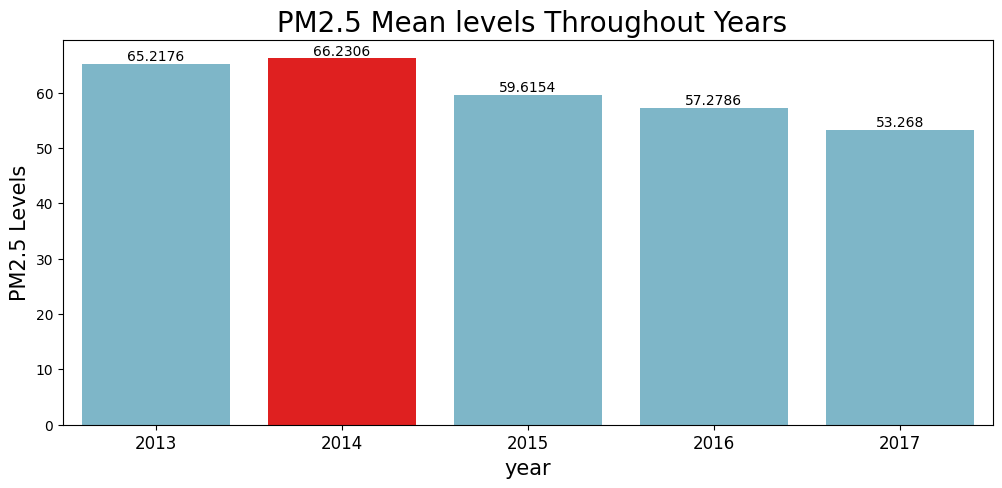

In [53]:
bar_chart(analyze_substances(stations_day_name_df,"mean","year"), 'year','mean','PM2.5')

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\2014976988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


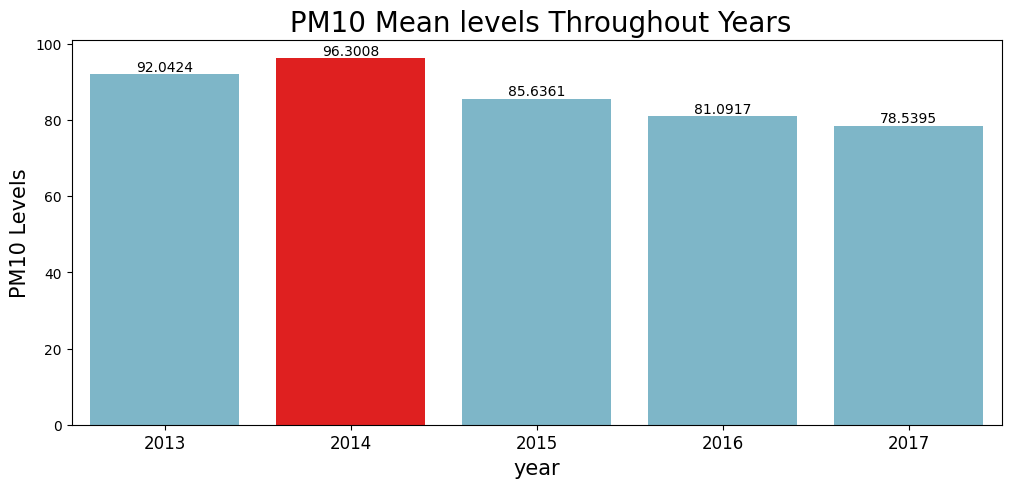

In [54]:
bar_chart(analyze_substances(stations_day_name_df,"mean","year"), 'year','mean','PM10')

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\2014976988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


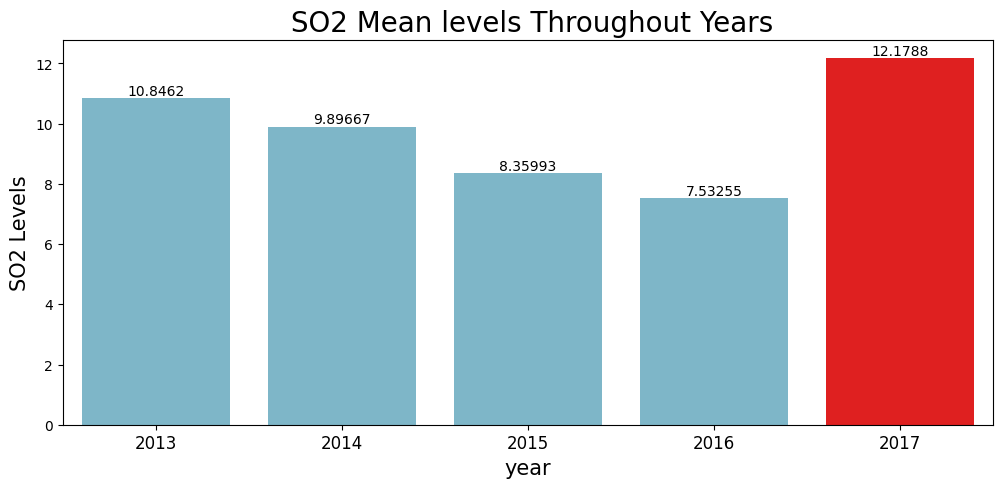

In [55]:
bar_chart(analyze_substances(stations_day_name_df,"mean","year"), 'year','mean','SO2')

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\2014976988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


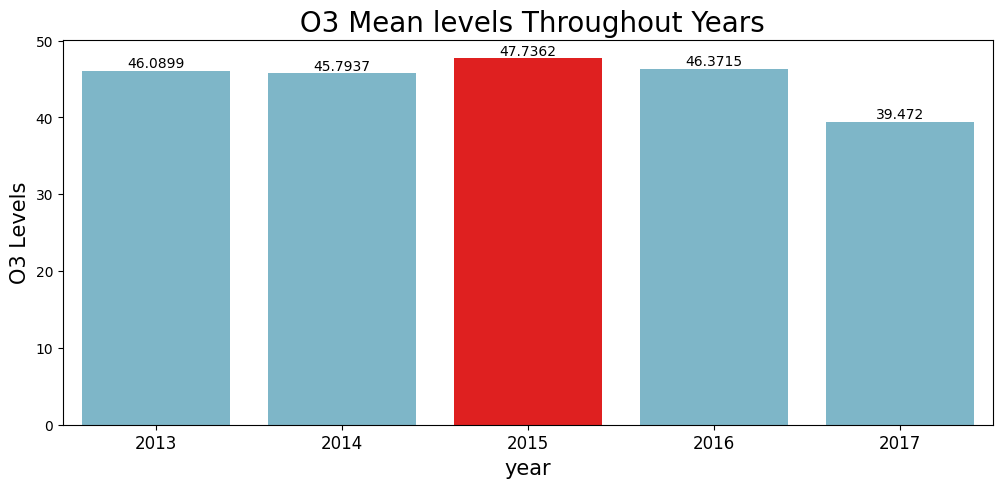

In [56]:
bar_chart(analyze_substances(stations_day_name_df,"mean","year"), 'year','mean','O3')

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\2014976988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


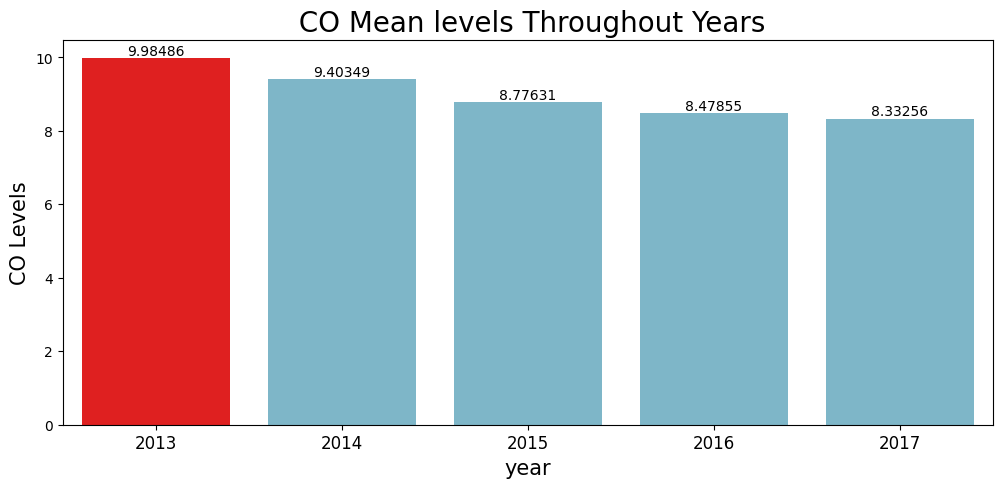

In [57]:
bar_chart(analyze_substances(stations_day_name_df,"mean","year"), 'year','mean','CO')

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\2014976988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


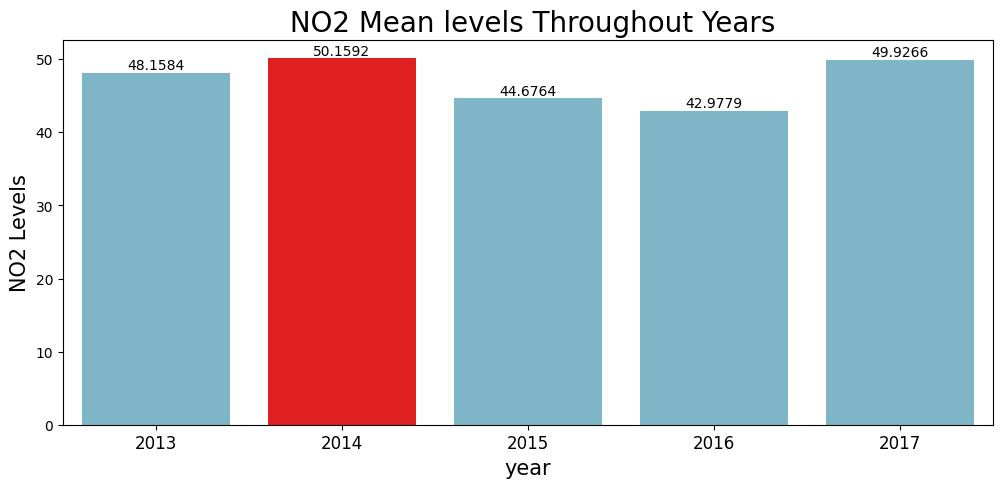

In [58]:
bar_chart(analyze_substances(stations_day_name_df,"mean","year"), 'year','mean','NO2')

### Pertanyaan 2:
- Stasiun mana yang memiliki level substansi tertinggi?


In [59]:
def compare_stations(df,substance,method):
    color_list = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3"]
    
    station_df = df.reset_index().groupby("station").agg({substance: method})
    plt.figure(figsize=(10,5))

    sns.barplot(
        x=substance, 
        y="station",
        data=station_df.sort_values(by=substance, ascending=False),
        palette=color_list
    )
    plt.title("{} Levels's {} Through All Stations".format(substance, method.capitalize()), loc="center", fontsize=15)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.tick_params(axis='y', labelsize=12)
    plt.show()


In [60]:
def iterate_station_comparison(df,method):
    for substance in substances:
        compare_stations(df,substance, method)

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


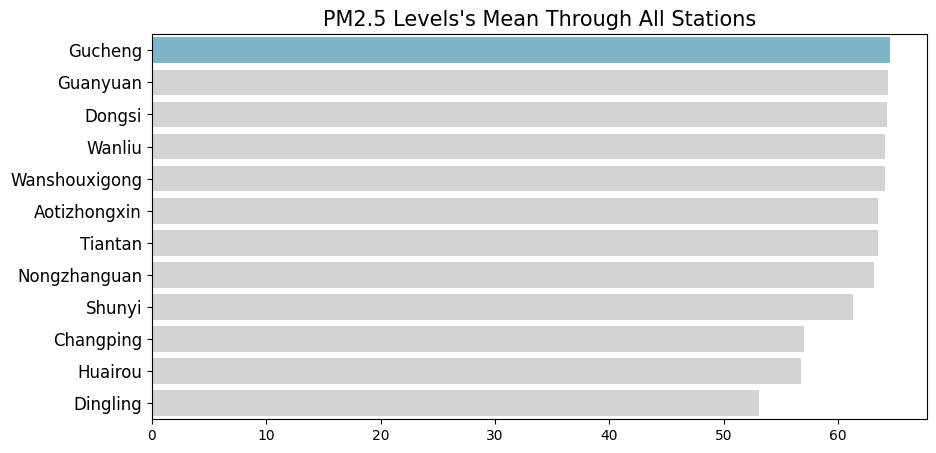

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


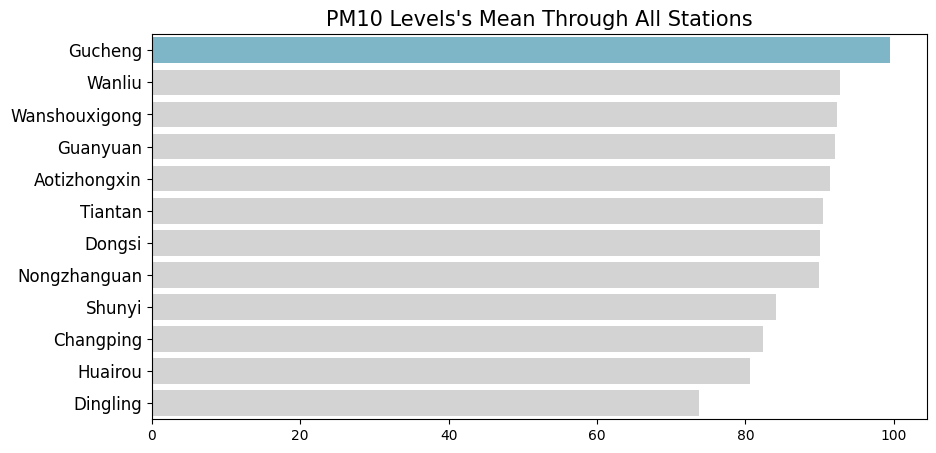

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


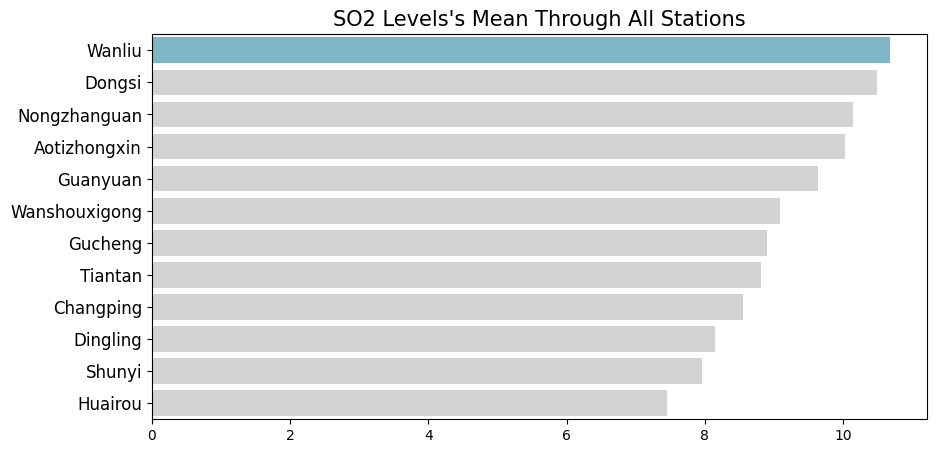

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


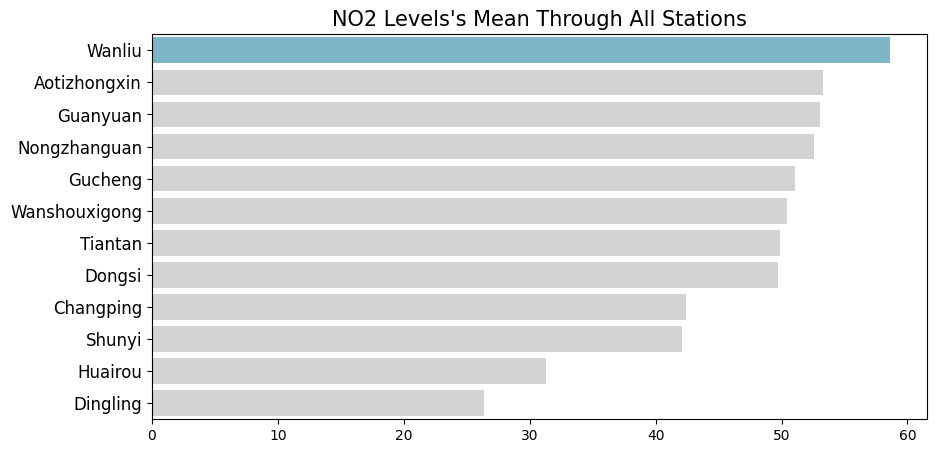

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


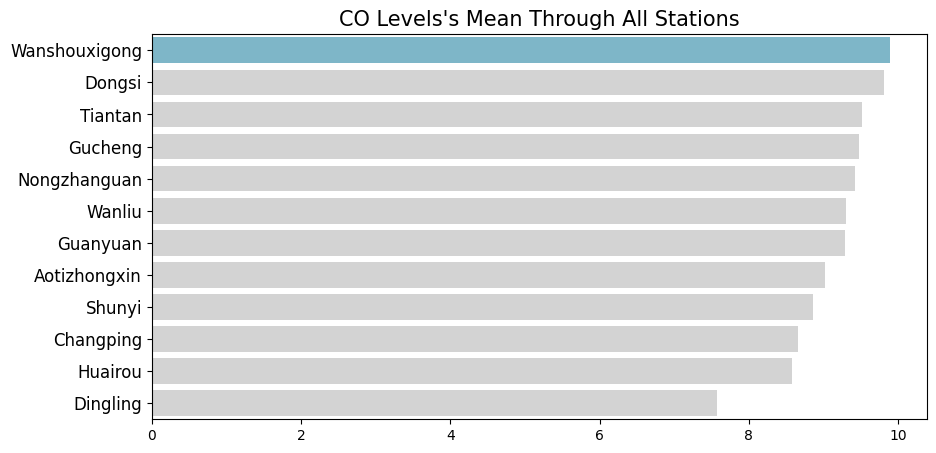

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


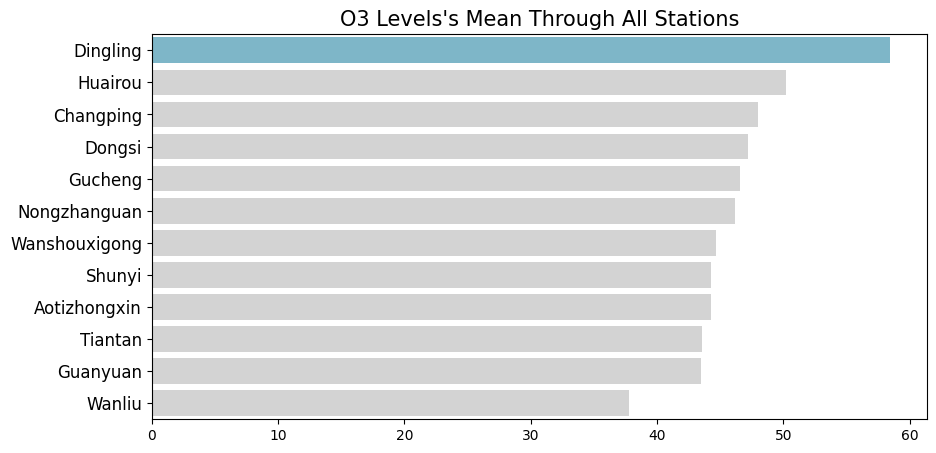

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


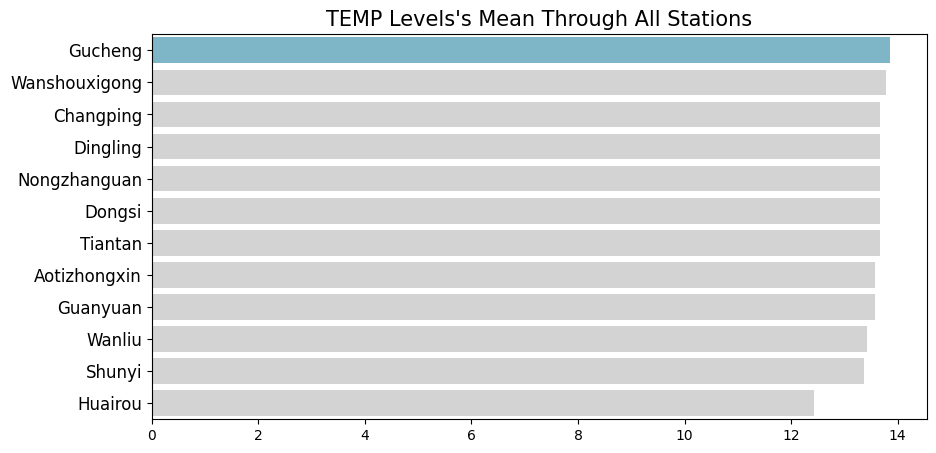

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


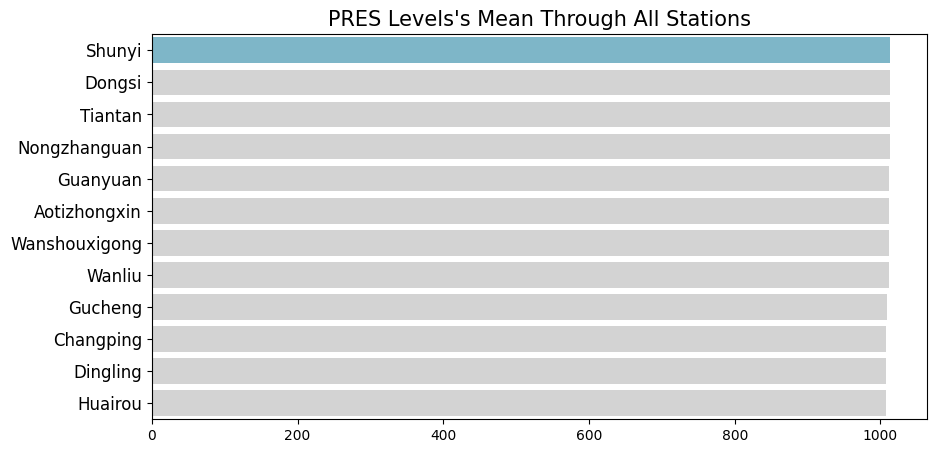

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


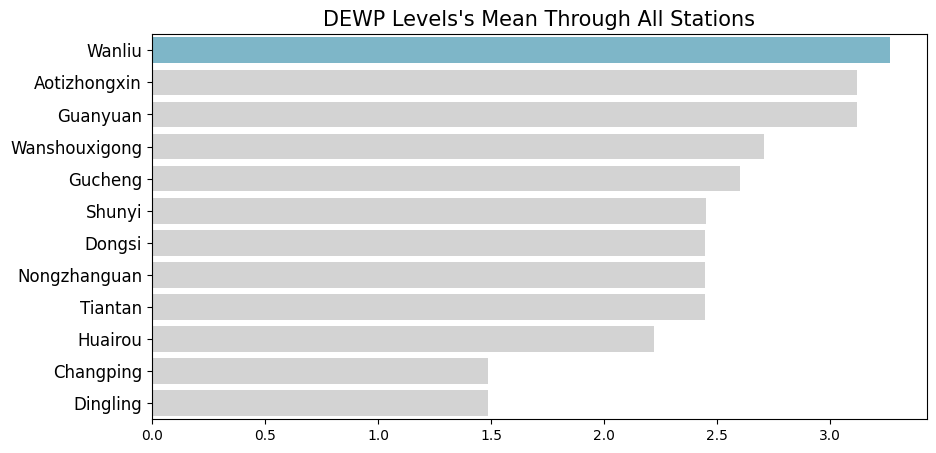

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


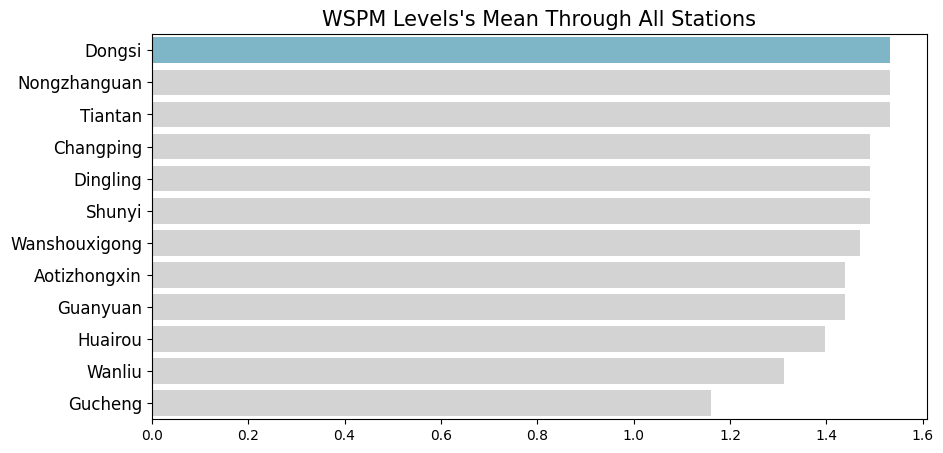

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1513063763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


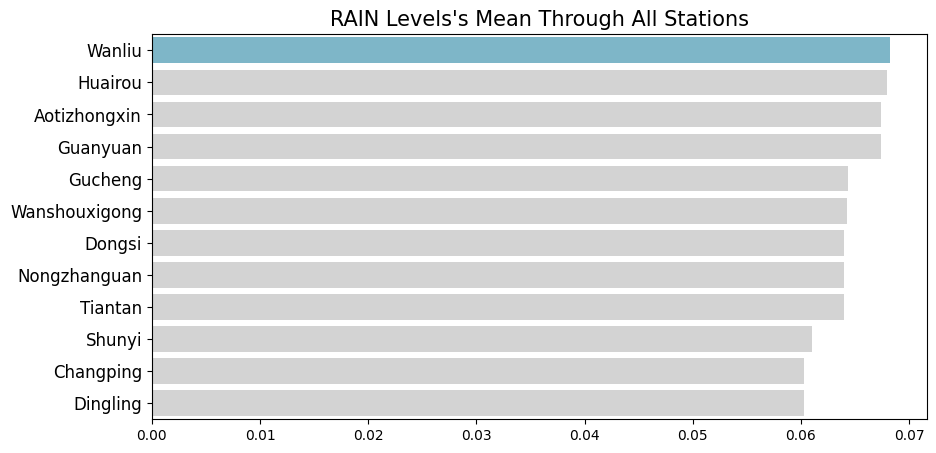

In [61]:
iterate_station_comparison(stations_all_df,"mean")

In [63]:
agg_dict = {}
for substance in substances:
    agg_dict[substance] = "mean"
pd.DataFrame(stations_all_df.reset_index().groupby("station").agg(agg_dict)["PM2.5"])


,PM2.5
station,
Aotizhongxin,63.497716
Changping,57.001263
Dingling,53.118306
Dongsi,64.310073
Guanyuan,64.369923
Gucheng,64.536450
Huairou,56.802758
Nongzhanguan,63.105870
Shunyi,61.327555


### Pertanyaan 3:
- Bagaimana kualitas udara di setiap stasiun berdasarkan penilaian polusi di setiap 24 jam atau tahunan?

In [96]:
def bar_chart_assess_quality(df,substance, station):
    safe_levels_color = "#72BCD4"
    unsafe_levels_color = '#FF0000'

    group_df = df.reset_index()
    if (station!=""):
        group_df = group_df.where(group_df["station"]==station)

    group_day_df = group_df.groupby(by="day").agg({substance: "mean"})

    day_substance_threshold = substances_threshold[substance]["day"]
    colors_day = [safe_levels_color if x < day_substance_threshold else unsafe_levels_color for x in group_day_df[substance]]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))
    
    sns.barplot(
        x="day",
        y=substance,
        data=group_day_df,
        palette=colors_day,
        hue= None,
        ax=ax[0]
    )

    safe_patch = mpatches.Patch(color=safe_levels_color, label='Safe Level')
    unsafe_patch = mpatches.Patch(color=unsafe_levels_color, label='Unsafe Level')

    ax[0].legend(handles=[safe_patch, unsafe_patch], loc='upper right')

    if('year' in substances_threshold.get(substance, {})):
        
        group_annual_df = group_df.groupby(by="year").agg({substance: "mean"})
        annual_substance_threshold = substances_threshold[substance]["year"]
        colors_annual = [safe_levels_color if x < annual_substance_threshold else unsafe_levels_color for x in group_annual_df[substance]]
       
        ax[1].set_ylabel(substance,size=15)
        ax[1].set_xlabel('Annually',size=15)
        ax[1].set_title("{} {} Level Annual-Mean Assessment".format(station.capitalize(), substance), loc="center", fontsize=18)
        ax[1].tick_params(axis ='x', labelsize=15, rotation=45)
    
        sns.barplot(
            x="year",
            y=substance,
            data=group_annual_df,
            palette=colors_annual,
            hue= None,
            ax=ax[1]
        )


    

    ax[0].set_ylabel(substance,size=15)
    ax[0].set_xlabel('Day',size=15)
    ax[0].set_title("{} {} Level 24 Hours-Mean Assessment".format(station.capitalize(), substance), loc="center", fontsize=18)
    ax[0].tick_params(axis ='x', labelsize=15, rotation=45)

    plt.suptitle("{} {} Quality Assessment".format(station, substance), fontsize=20)
    plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1844174408.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\asus\AppData\Local\Temp\ipykernel_20060\1844174408.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


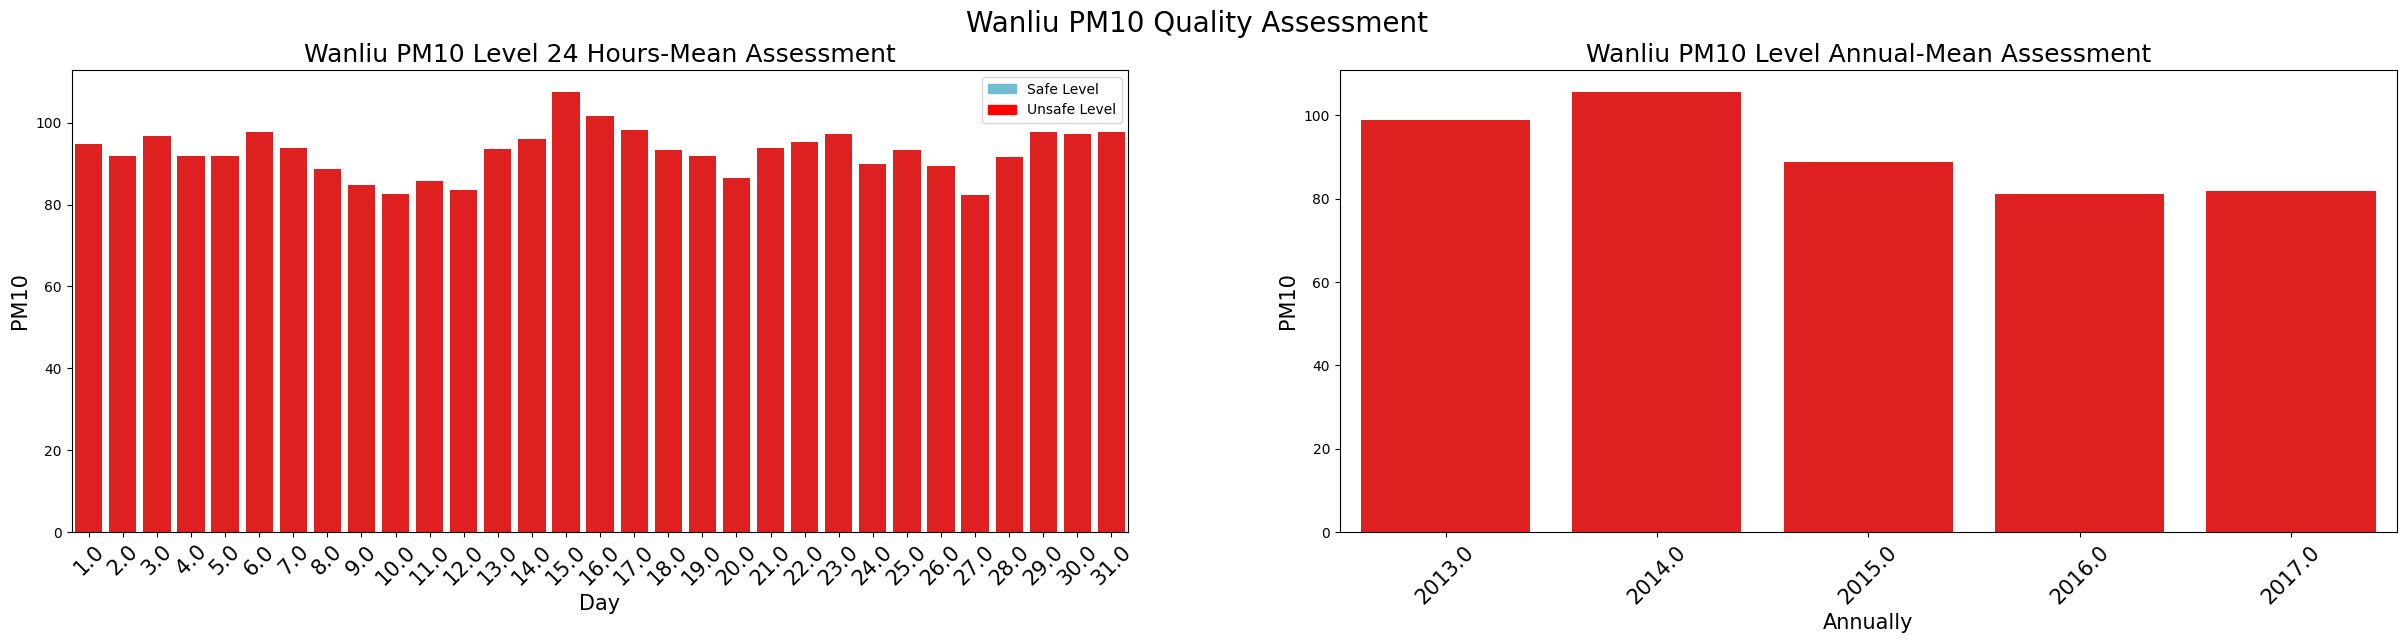

In [97]:
bar_chart_assess_quality(stations_all_df, "PM10", "Wanliu")

## Conclusion

### Conclusion 1

2014 merupakan tahun jumlah rata-rata level berbagai substansi mencapai puncak, yaitu NO2, PM2.5 dan PM10 

### Conclusion 2

Wanliu merupakan stasiun dengan jumlah substansi mencapai puncak paling banyak, yaitu curah hujan, DEWP, NO2, dan SO2

### Conclusion 3

Seluruh stasiun memiliki kualitas udara yang buruk, dengan seluruh polutan udara yang melewati batas aman

In [103]:
stations_all_df.to_csv("stations_all.csv")